## Data Science And Business Analytics Intern At  GRIP @ The Sparks Foundation ##

## Author :- Vedant Lotia ##

## Task 4 :- Exploratory Data Analysis - Terrorism ##

## Problem Statement :- As a security/defense analyst, try to find out the hot zone of terrorism.What all security issues and insights you can derive by EDA? ##

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
glob = pd.read_csv("C:\\Users\\HP\\Desktop\\Global_terrorism_data.csv", encoding = "ISO-8859-1", engine='python' )
glob.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
glob.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       1.970000e+11   1970       7     2        NaN         0        NaN   
1       1.970000e+11   1970       0     0        NaN         0        NaN   
2       1.970010e+11   1970       1     0        NaN         0        NaN   
3       1.970010e+11   1970       1     0        NaN         0        NaN   
4       1.970010e+11   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  2.017120e+11   2017      12    31        NaN         0        NaN   
181687  2.017120e+11   2017      12    31        NaN         0        NaN   
181688  2.017120e+11   2017      12    31        NaN         0        NaN   
181689  2.017120e+11   2017      12    31        NaN         0        NaN   
181690  2.017120e+11   2017      12    31        NaN         0        NaN   

        country         country_txt  region

In [4]:
print(glob.columns)

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [6]:
glob.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
glob.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
181689,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True


## Cleaning data by partially taking data ##

In [7]:
ftc = glob.iloc[:,:10]
ftc

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4
...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6


In [8]:
ftc_up = ftc.drop(['approxdate','resolution','extended'],axis=1)
ftc_up

,eventid,iyear,imonth,iday,country,country_txt,region
0,1.970000e+11,1970,7,2,58,Dominican Republic,2
1,1.970000e+11,1970,0,0,130,Mexico,1
2,1.970010e+11,1970,1,0,160,Philippines,5
3,1.970010e+11,1970,1,0,78,Greece,8
4,1.970010e+11,1970,1,0,101,Japan,4
...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,182,Somalia,11
181687,2.017120e+11,2017,12,31,200,Syria,10
181688,2.017120e+11,2017,12,31,160,Philippines,5
181689,2.017120e+11,2017,12,31,92,India,6


In [9]:
setc = glob.iloc[:,10:26]
setc

,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple
0,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0
1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0
2,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0
3,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0
4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0
181687,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0
181688,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0
181689,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0


In [10]:
setc_up = setc.drop(['multiple'],axis=1)
setc_up

,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt
0,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN
1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN
2,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN
3,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN
4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action
181687,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action
181688,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN
181689,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN


In [11]:
ttc = glob.iloc[:,26:41]
ttc

,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1
0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0
1,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0
2,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0
3,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0
4,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0
181687,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0
181688,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0
181689,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,92.0


In [12]:
ttc_up= ttc.drop(['suicide','attacktype2','attacktype2_txt','attacktype3','attacktype3_txt',],axis=1)
ttc_up

,success,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1
0,1,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0
1,1,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0
2,1,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0
3,1,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0
4,1,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0
...,...,...,...,...,...,...,...,...,...,...
181686,1,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0
181687,1,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0
181688,1,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0
181689,0,3,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,92.0


In [13]:
fotc = glob.iloc[:,41:56]
fotc

,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3
0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181687,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181688,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181689,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
fotc_up= fotc.drop(glob.iloc[:,42:56],axis='columns')
fotc_up

,natlty1_txt
0,Dominican Republic
1,Belgium
2,United States
3,United States
4,United States
...,...
181686,Somalia
181687,Russia
181688,Philippines
181689,India


In [15]:
fiftc = glob.iloc[:,56:71]
fiftc

,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap
0,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN
1,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN
2,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN
3,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN
4,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0
181687,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0
181688,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0
181689,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0


In [16]:
fiftc_up=fiftc.drop(["natlty3","natlty3_txt","gsubname","gname2","gsubname2","gname3","gsubname3","motive","guncertain1","guncertain2","guncertain3","guncertain3","individual","nperpcap"], axis=1)
fiftc_up

,gname,nperps
0,MANO-D,NaN
1,23rd of September Communist League,7.0
2,Unknown,NaN
3,Unknown,NaN
4,Unknown,NaN
...,...,...
181686,Al-Shabaab,-99.0
181687,Muslim extremists,-99.0
181688,Bangsamoro Islamic Freedom Movement (BIFM),-99.0
181689,Unknown,-99.0


In [17]:
sixtc = glob.iloc[:,71:86]
sixtc

,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN
181687,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN
181688,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Incendiary,18.0,Arson/Fire,NaN
181689,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,7.0,Grenade,NaN


In [18]:
sixtc_po=sixtc.drop(glob.iloc[:,73:81],axis='columns')
sixtc_po

,claimed,claimmode,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2
0,NaN,NaN,13,Unknown,NaN,NaN,NaN
1,NaN,NaN,13,Unknown,NaN,NaN,NaN
2,NaN,NaN,13,Unknown,NaN,NaN,NaN
3,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN
4,NaN,NaN,8,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...
181686,1.0,10.0,5,Firearms,5.0,Unknown Gun Type,NaN
181687,0.0,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN
181688,0.0,NaN,8,Incendiary,18.0,Arson/Fire,NaN
181689,0.0,NaN,6,Explosives,7.0,Grenade,NaN


In [19]:
sixth_up = sixtc_po.drop(['weaptype2'],axis=1)
sixth_up

,claimed,claimmode,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt
0,NaN,NaN,13,Unknown,NaN,NaN
1,NaN,NaN,13,Unknown,NaN,NaN
2,NaN,NaN,13,Unknown,NaN,NaN
3,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type
4,NaN,NaN,8,Incendiary,NaN,NaN
...,...,...,...,...,...,...
181686,1.0,10.0,5,Firearms,5.0,Unknown Gun Type
181687,0.0,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)"
181688,0.0,NaN,8,Incendiary,18.0,Arson/Fire
181689,0.0,NaN,6,Explosives,7.0,Grenade


In [20]:
sevtc = glob.iloc[:,86:101]
sevtc

,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
181687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0
181688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
181689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0


In [21]:
sevtc_po=sevtc.drop(glob.iloc[:,86:97],axis='columns')
sevtc_po

,weapdetail,nkill,nkillus,nkillter
0,NaN,1.0,NaN,NaN
1,NaN,0.0,NaN,NaN
2,NaN,1.0,NaN,NaN
3,Explosive,NaN,NaN,NaN
4,Incendiary,NaN,NaN,NaN
...,...,...,...,...
181686,NaN,1.0,0.0,0.0
181687,Mortars were used in the attack.,2.0,0.0,0.0
181688,NaN,0.0,0.0,0.0
181689,A thrown grenade was used in the attack.,0.0,0.0,0.0


In [22]:
sevth_up = sevtc_po.drop(['nkillus','nkillter'],axis=1)
sevth_up

,weapdetail,nkill
0,NaN,1.0
1,NaN,0.0
2,NaN,1.0
3,Explosive,NaN
4,Incendiary,NaN
...,...,...
181686,NaN,1.0
181687,Mortars were used in the attack.,2.0
181688,NaN,0.0
181689,A thrown grenade was used in the attack.,0.0


In [23]:
eitc = glob.iloc[:,101:116]
eitc

,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry
0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico
2,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
181687,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN
181688,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN
181689,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
eith_up = eitc.drop(['nwoundus','nwoundte','propextent_txt','ishostkid','nhostkid','nhostkidus','nhours','ndays','divert'],axis=1)
eith_up

,nwound,property,propextent,propvalue,propcomment,kidhijcountry
0,0.0,0,NaN,NaN,NaN,NaN
1,0.0,0,NaN,NaN,NaN,Mexico
2,0.0,0,NaN,NaN,NaN,NaN
3,NaN,1,NaN,NaN,NaN,NaN
4,NaN,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
181686,2.0,-9,NaN,NaN,NaN,NaN
181687,7.0,1,4.0,-99.0,Seven military planes were damaged in this att...,NaN
181688,0.0,1,4.0,-99.0,Houses were damaged in this attack.,NaN
181689,0.0,-9,NaN,NaN,NaN,NaN


In [25]:
nitc = glob.iloc[:,116:135]
nitc

,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [26]:
nitc_po=nitc.drop(glob.iloc[:,118:126],axis='columns')
nitc_po

,ransom,ransomamt,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0.0,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.0,800000.0,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
181686,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [27]:
nith_up = nitc_po.drop(['related'],axis=1)
nith_up

,ransom,ransomamt,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,0.0,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,1.0,800000.0,NaN,NaN,NaN,PGIS,0,1,1,1
2,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...
181686,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0
181687,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1
181688,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0
181689,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9


## Required and cleaned data ##

In [100]:
cleaned = pd.concat([ftc_up,setc_up,ttc_up,fotc_up,fiftc_up,sixth_up,sevth_up,eith_up,nith_up],axis=1)
cleaned

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,...,ransom,ransomamt,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,0.0,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,...,1.0,800000.0,NaN,NaN,NaN,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,...,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,...,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,...,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0
181687,2.017120e+11,2017,12,31,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,...,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1
181688,2.017120e+11,2017,12,31,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,...,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0
181689,2.017120e+11,2017,12,31,92,India,6,South Asia,Manipur,Imphal,...,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9


In [29]:
cleaned.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'success',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'nperps', 'claimed', 'claimmode', 'weaptype1',
       'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weapdetail',
       'nkill', 'nwound', 'property', 'propextent', 'propvalue', 'propcomment',
       'kidhijcountry', 'ransom', 'ransomamt', 'scite1', 'scite2', 'scite3',
       'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

## Data Visualization and Analysis ##

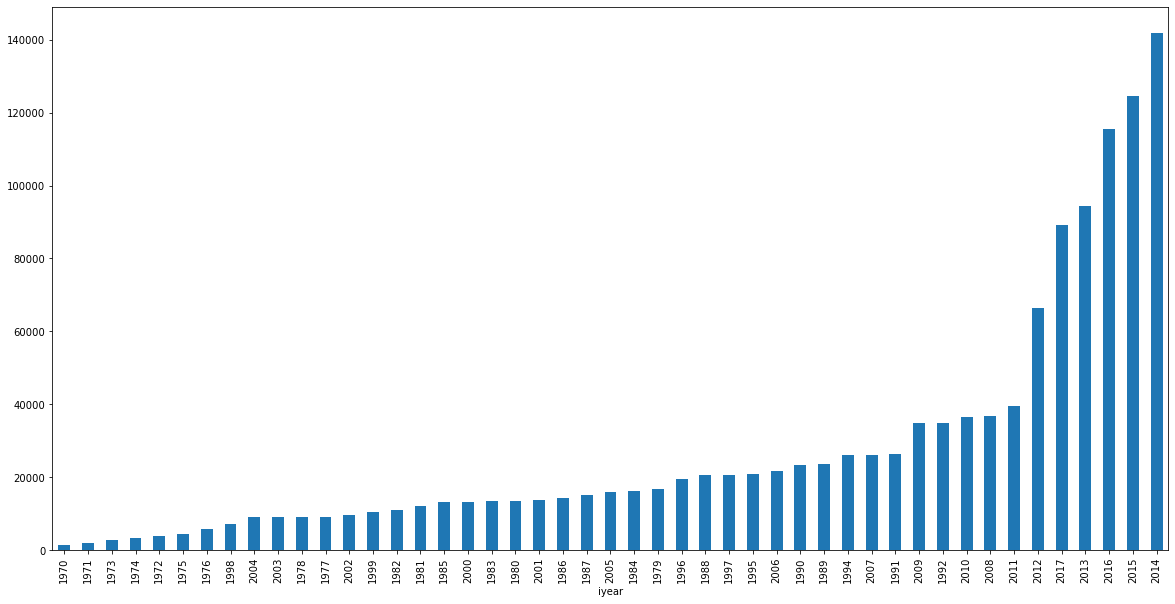

In [30]:
# Terrorist attacks by region from 1970 to 2015 #
plt.figure(figsize=(20,10))
cleaned.groupby(by='iyear')['region'].sum().sort_values(ascending= True).plot(kind='bar')
plt.show()

## Year 2014 is the highest attacked year in a region ##

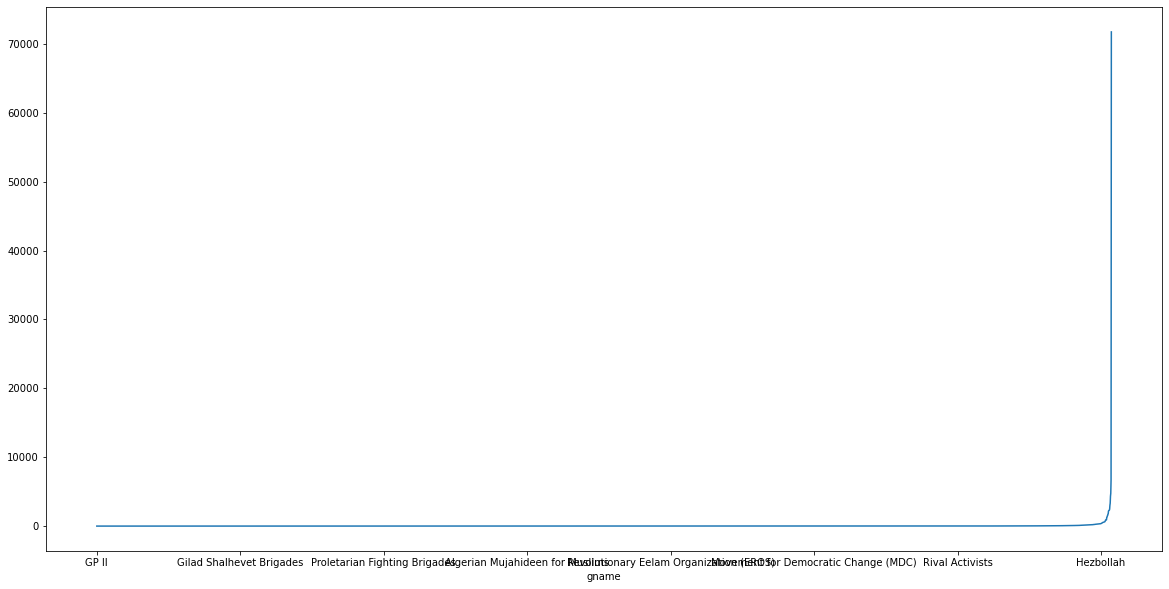

In [104]:
plt.figure(figsize=(20,10))
g = cleaned.groupby(by='gname')['success'].sum().sort_values(ascending=True).plot(kind='line')

## Hezbollah is the gang whose success rate is highest than other gangs

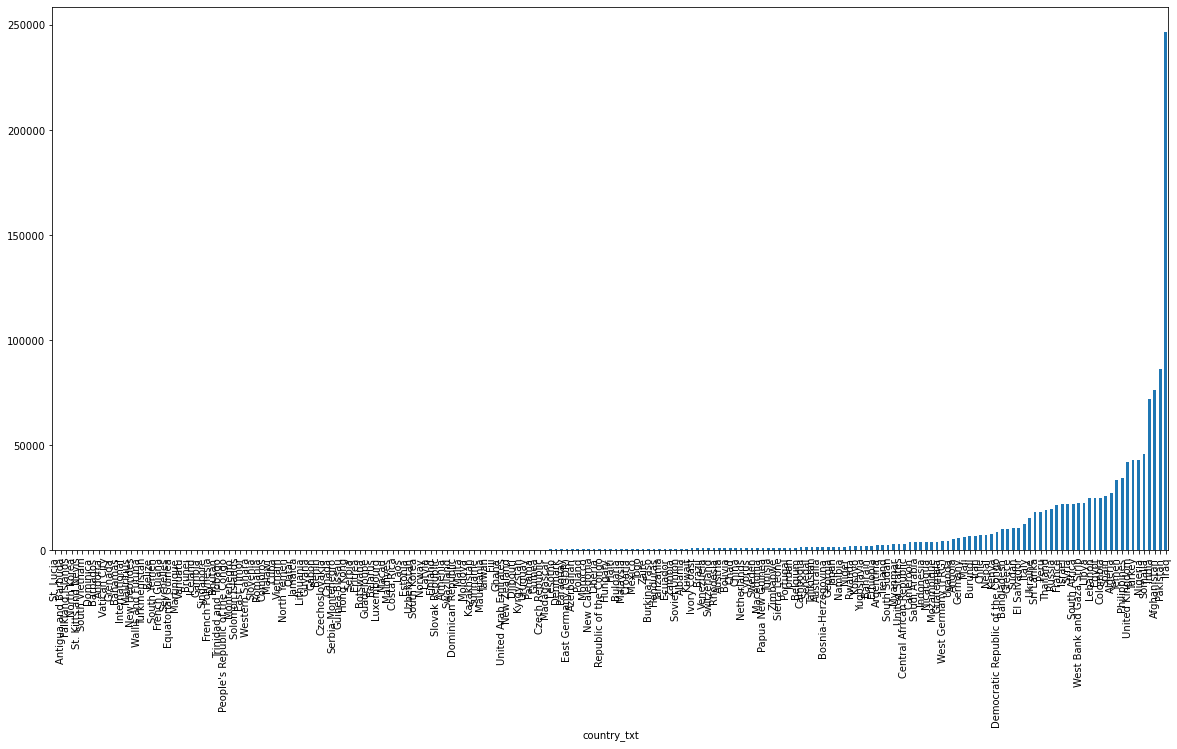

In [85]:
plt.figure(figsize=(20,10))
cleaned.groupby(by='country_txt')['region'].sum().sort_values(ascending=True).plot(kind='bar')
plt.show()

In [33]:
v= cleaned.groupby(by='country_txt')['region'].sum().sort_values(ascending=True)
v.max

<bound method Series.max of country_txt
St. Lucia                   2
Antigua and Barbuda         2
Falkland Islands            3
North Korea                 4
St. Kitts and Nevis         4
                        ...  
Somalia                 45562
India                   71760
Afghanistan             76386
Pakistan                86208
Iraq                   246360
Name: region, Length: 205, dtype: int64>

## Iraq is the country whose regions are highest attacked 

In [38]:
iraq = cleaned.loc[(cleaned['country_txt'] =='Iraq')]
iraq

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,...,ransom,ransomamt,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
2854,1.975030e+11,1975,3,1,95,Iraq,10,Middle East & North Africa,Nineveh,Mosul,...,1.0,5000000.0,NaN,NaN,NaN,Hijacking DB,-9,-9,0,-9
4385,1.976120e+11,1976,12,15,95,Iraq,10,Middle East & North Africa,Baghdad,Baghdad,...,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9
4393,1.976120e+11,1976,12,18,95,Iraq,10,Middle East & North Africa,Unknown,Penjwon,...,1.0,0.0,NaN,NaN,NaN,PGIS,0,1,1,1
4402,1.976120e+11,1976,12,24,95,Iraq,10,Middle East & North Africa,Baghdad,Baghdad,...,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
8688,1.979060e+11,1979,6,15,95,Iraq,10,Middle East & North Africa,Basra,Basra,...,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181669,2.017120e+11,2017,12,30,95,Iraq,10,Middle East & North Africa,Kirkuk,Kirkuk,...,NaN,NaN,"""Five civilians killed in two bomb attacks in ...","""Iraq: Security Roundup 1900 GMT 31 December 2...","""Iraq: Roundup of Violent Activities Targeting...",START Primary Collection,-9,-9,0,-9
181670,2.017120e+11,2017,12,31,95,Iraq,10,Middle East & North Africa,Diyala,Hawd al-Waqf,...,NaN,NaN,"""Iraq: Security Roundup 1900 GMT 31 December 2...","""Terrorism: Roundup of Official ISIS Messages ...",NaN,START Primary Collection,0,1,0,1
181671,2.017120e+11,2017,12,31,95,Iraq,10,Middle East & North Africa,Saladin,Farhatiyah,...,NaN,NaN,"""Islamic State attack leaves thirteen civilian...","""3 people killed in IS attack in central Iraq,...","""Daesh gunmen kill 3 in northern Iraq: Police,...",START Primary Collection,0,1,0,1
181674,2.017120e+11,2017,12,31,95,Iraq,10,Middle East & North Africa,Nineveh,Baaj,...,NaN,NaN,"""Five IS militants killed as paramilitary troo...","""1,262 Killed in Iraq During December,"" Antiwa...",NaN,START Primary Collection,0,1,0,1


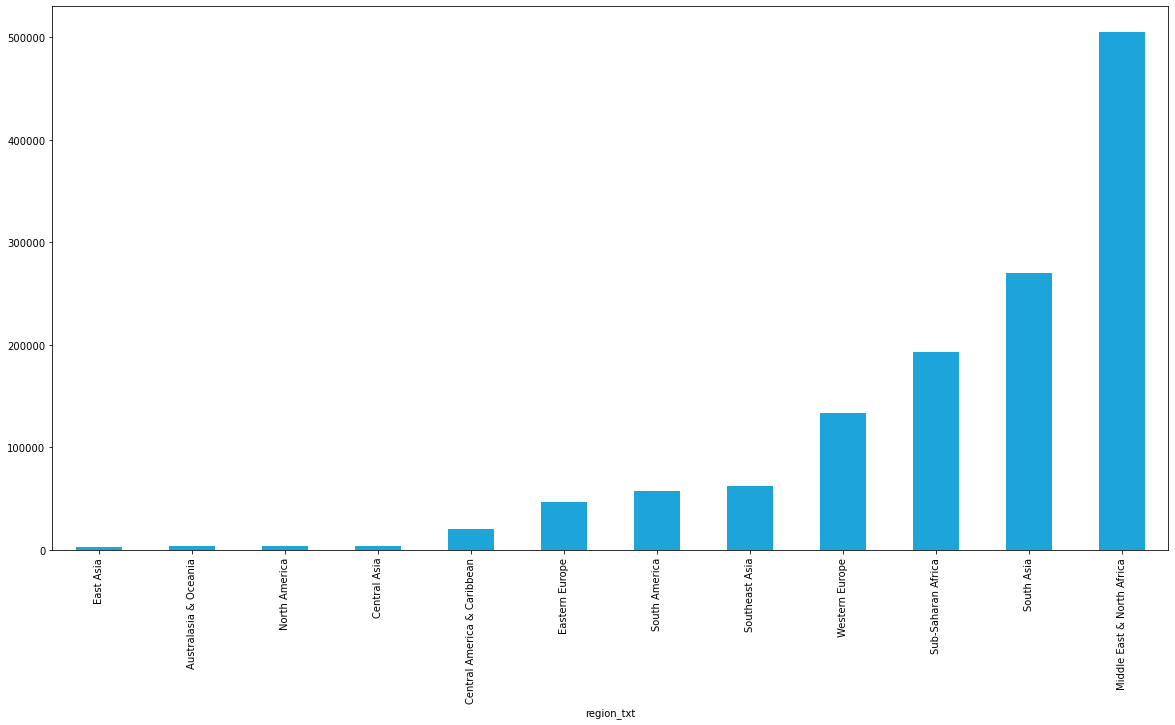

In [35]:
plt.figure(figsize=(20,10))
cleaned.groupby(by='region_txt')['region'].sum().sort_values(ascending=True).plot(kind='bar',color='#1DA4D9')
plt.show()

## Middle East & North Africa are the region are the most attacked regions ##

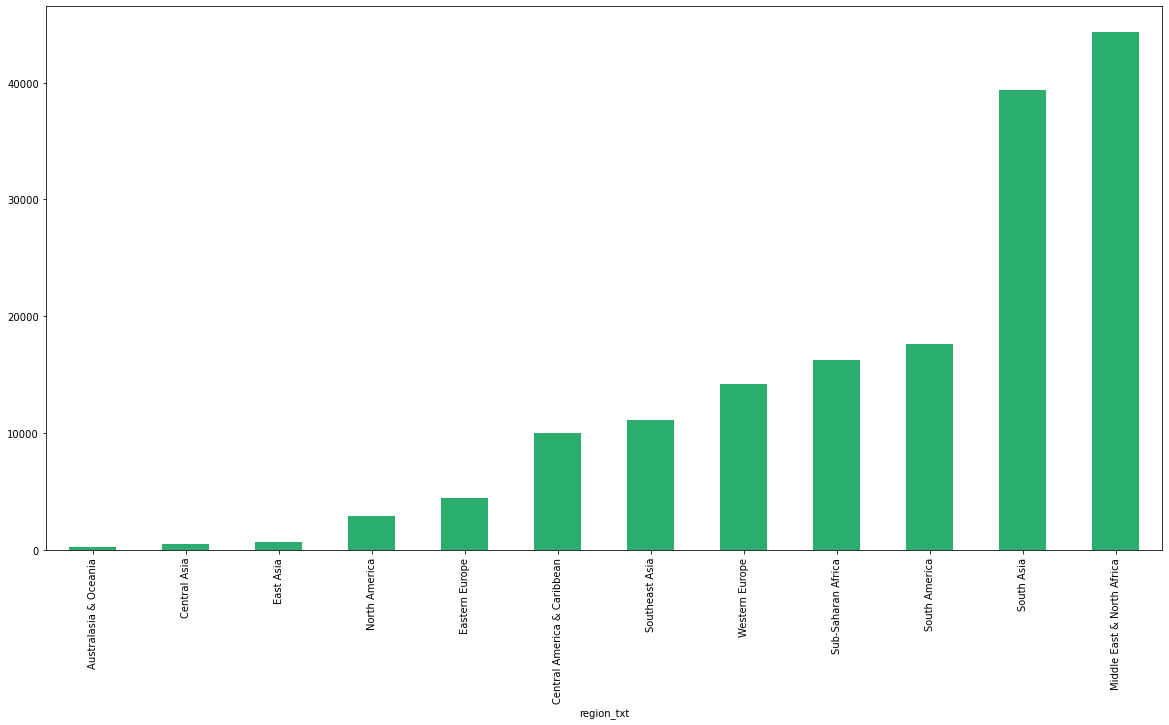

In [36]:
plt.figure(figsize=(20,10))
cleaned.groupby(by='region_txt')['success'].sum().sort_values(ascending=True).plot(kind='bar',color='#2BAD6D')
plt.show()

## Middle East & North Africa are the region where success rate is high ##

C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\HP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0, flags=flags)


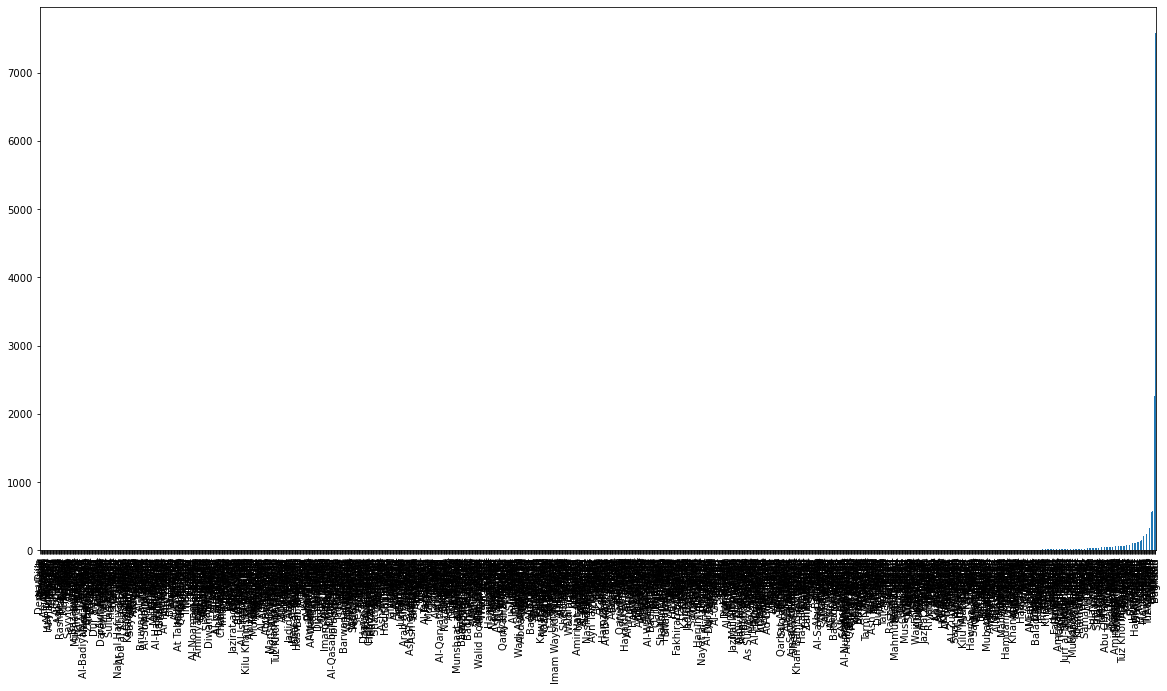

In [71]:
plt.figure(figsize=(20,10))
city=iraq['city'].value_counts(ascending=True)
city.plot(kind='bar')
plt.show()

In [69]:
city.max

<bound method Series.max of Deraa Dijla       1
Al-Walib          1
Aheimir           1
Karanaz           1
Tawakul           1
               ... 
Fallujah        579
Baqubah         745
Kirkuk          925
Mosul          2265
Baghdad        7585
Name: city, Length: 1513, dtype: int64>

## Baghdad is the hottest zone for terrorism ##

In [76]:
bagh = iraq.loc[(iraq['city'] =='Baghdad')]
bagh.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'success',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'nperps', 'claimed', 'claimmode', 'weaptype1',
       'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weapdetail',
       'nkill', 'nwound', 'property', 'propextent', 'propvalue', 'propcomment',
       'kidhijcountry', 'ransom', 'ransomamt', 'scite1', 'scite2', 'scite3',
       'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

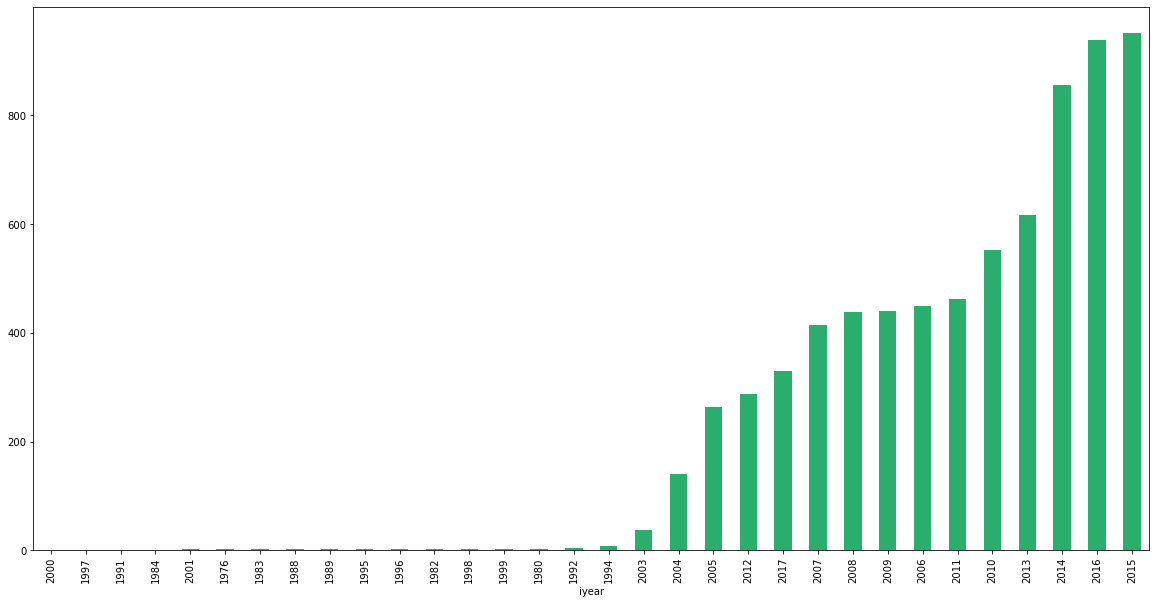

In [96]:
plt.figure(figsize=(20,10))
bagh.groupby(by='iyear')['success'].sum().sort_values(ascending=True).plot(kind='bar',color='#2BAD6D')
plt.show()

## 2015 has the highest success rate in Baghdad ##

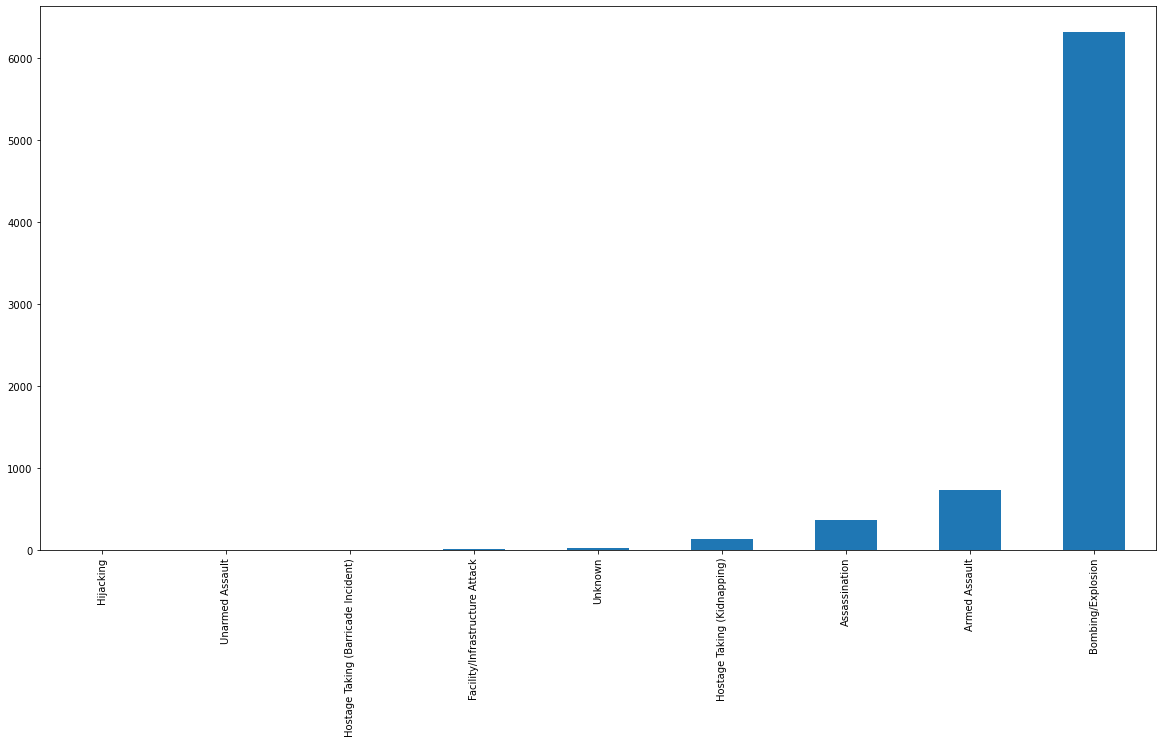

In [79]:
plt.figure(figsize=(20,10))
att_types = bagh['attacktype1_txt'].value_counts(ascending=True).plot(kind='bar')
plt.show()

## Bombing/Explosion is the highest attack type in baghdad ##

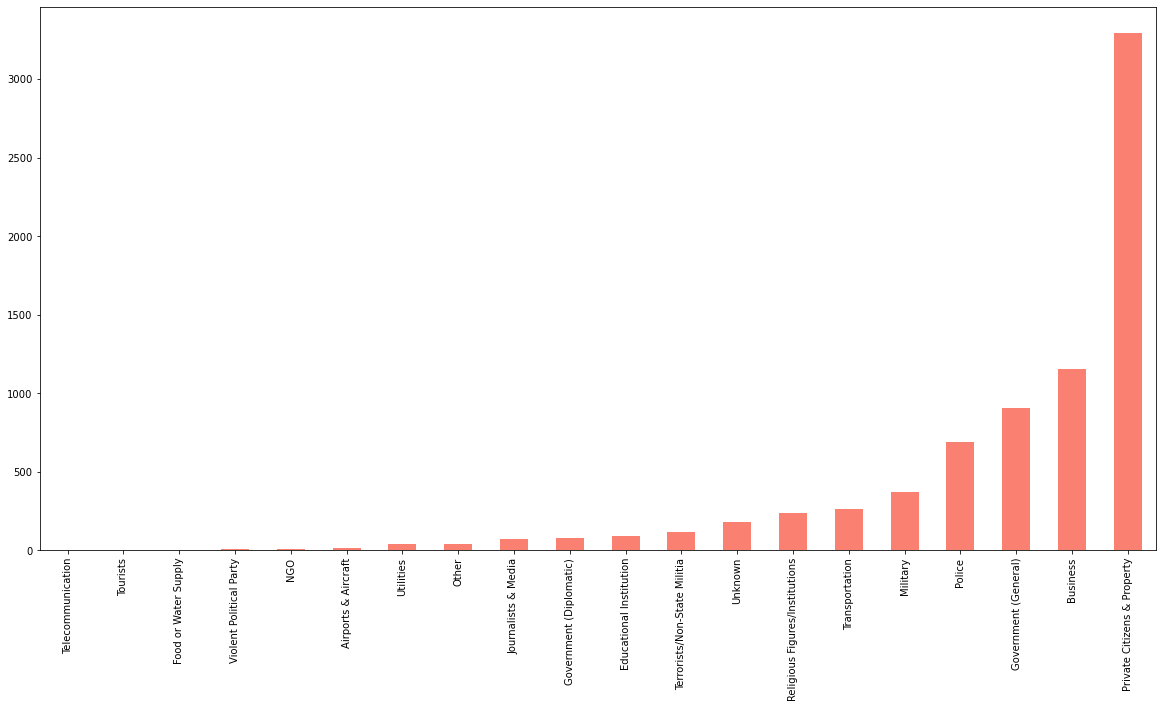

In [83]:
plt.figure(figsize=(20,10))
tarty_types = bagh['targtype1_txt'].value_counts(ascending=True).plot(kind='bar',color='#FA8072')
plt.show()

## Private Citizens & Property is the most targeted type of terrorists ##

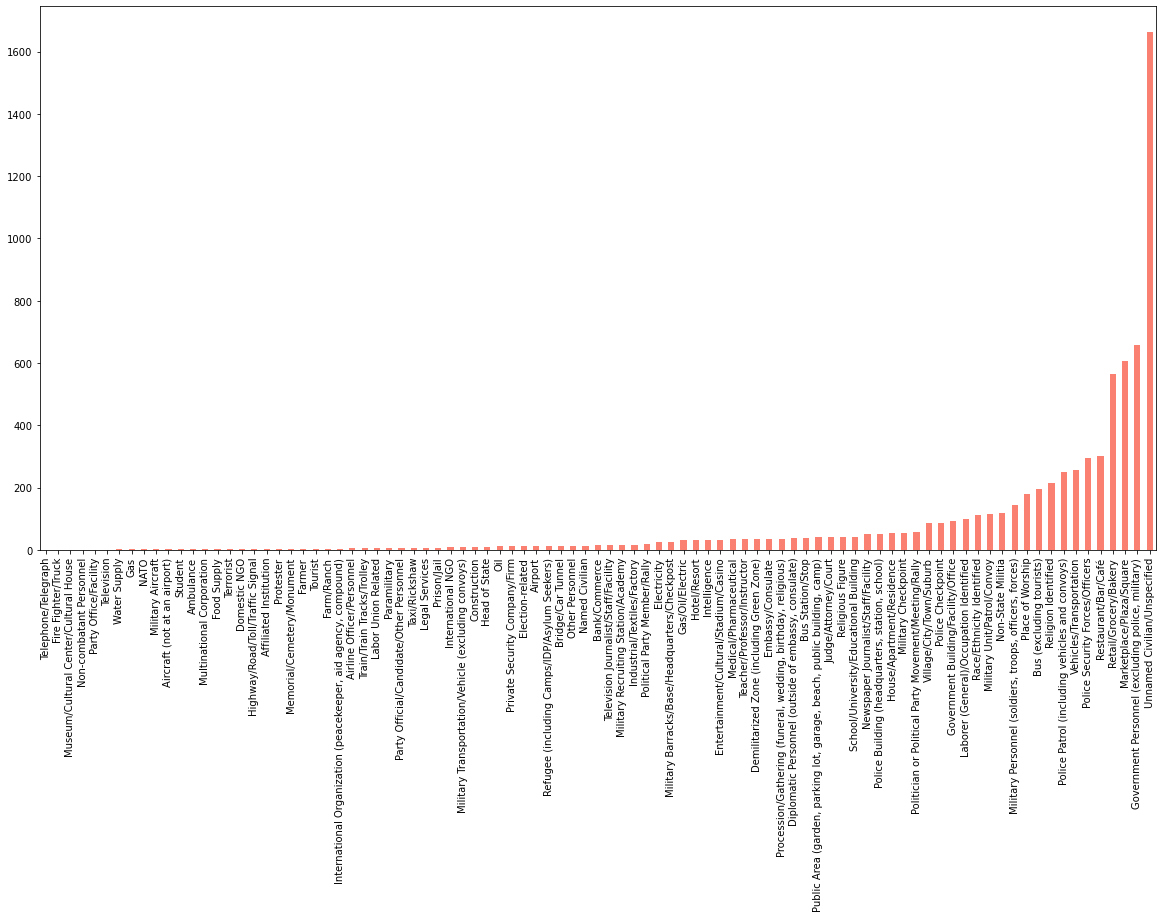

In [88]:
plt.figure(figsize=(20,10))
subtar_types = bagh['targsubtype1_txt'].value_counts(ascending=True).plot(kind='bar',color='#FA8072')
plt.show()

## Unnamed civilian/unspecified is the most targeted sub-type of terrorists

# <u>Summary:-</u> 

### - Baghdad is the hottest zone for terrorism

### - Year 2014 is the highest attacked year in a region ###

### - Iraq is the country whose regions are highest attacked ###

### - Middle East & North Africa are the regions are the most attacked regions ###

### - Middle East & North Africa are the regions where success rate is high

### - 2015 has the highest success rate in Baghdad

### - Bombing/Explosion is the highest attack type in baghdad

### - Private Citizens & Property is the most targeted type of terrorists

### - Unnamed civilian/unspecified is the most targeted sub-type of terrorists

# Thank You